In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import gzip

In [11]:
# 定义本地数据集路径
dataset_dir = os.path.join('..', 'dataset', 'mnist', 'MNIST', 'raw')

In [19]:
# 加载本地数据集
def load_mnist_images(filename):
    with gzip.open(os.path.join(dataset_dir, filename), 'rb') as f:
        return np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

def load_mnist_labels(filename):
    with gzip.open(os.path.join(dataset_dir, filename), 'rb') as f:
        return np.frombuffer(f.read(), np.uint8, offset=8)

In [23]:
# 加载数据集
train_images = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

In [27]:
# 加载训练集
test_images = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [29]:
# 归一化: 将图像的值标准化为0到1的区间
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

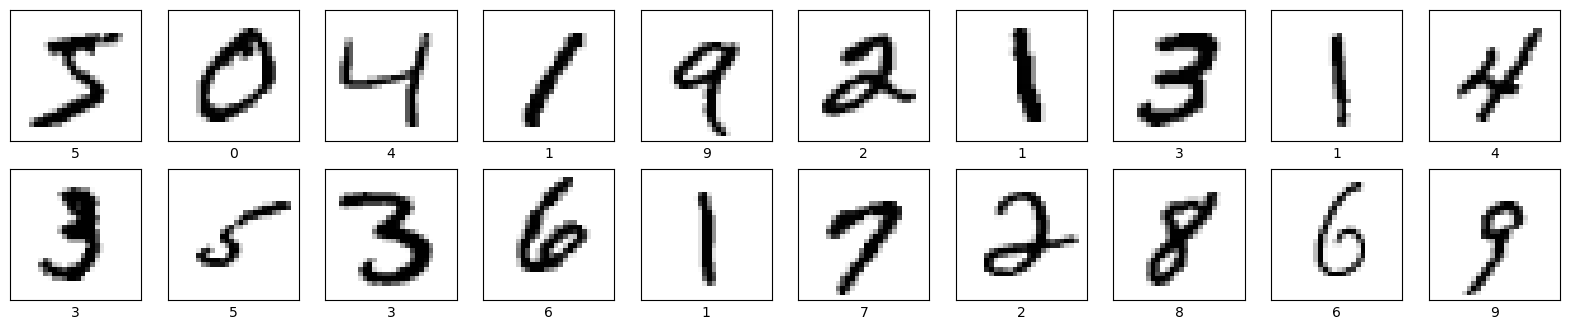

In [31]:
# 可视化
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(5, 10, i+1)
    plt.xticks([]) # 移除当前子图的x轴与y轴刻度 不显示坐标轴上的数字
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # 在当前子图显示第i张训练图像 使用二值颜色映射(黑白)
    plt.xlabel(train_labels[i]) # 在子图的x轴下方显示该图像的标签

plt.show()

In [37]:
# 调整图片格式
train_images = train_images.reshape((60000, 28, 28, 1)) # 添加通道维度 num/height/width/channel
test_images = test_images.reshape((10000, 28, 28, 1))

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [41]:
# 构建CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # channel_num/kernel_size/activation function/input_shape
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'), # Fully Connected Layer
    layers.Dense(10)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# 编译
model.compile(optimizer='adam', # logits: 模型最后一层的原始输出值(未经过softmax) from_logits: 需要在内部自动应用softmax函数将logits转换为概率分布 再计算交叉熵损失
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy']) # 显示指定性能指标

In [45]:
# 训练
history = model.fit(train_images, train_labels, epochs=10, # 训练10轮后
                    validation_data=(test_images, test_labels)) # 用测试集验证

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9578 - loss: 0.1398 - val_accuracy: 0.9834 - val_loss: 0.0493
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9860 - loss: 0.0457 - val_accuracy: 0.9863 - val_loss: 0.0421
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9904 - loss: 0.0304 - val_accuracy: 0.9895 - val_loss: 0.0313
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9909 - val_loss: 0.0272
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.9894 - val_loss: 0.0347
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9954 - loss: 0.0137 - val_accuracy: 0.9921 - val_loss: 0.0304
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9906 - val_loss: 0.0315
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9969 - loss: 0

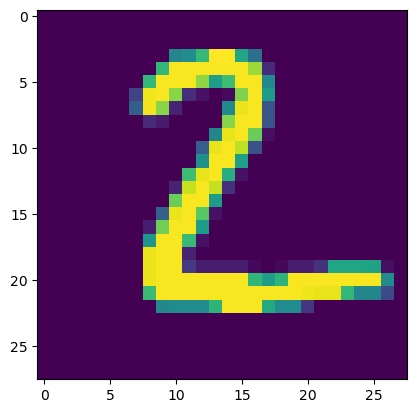

In [49]:
plt.imshow(test_images[1])

In [51]:
pre = model.predict(test_images)
pre[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([ -3.5506122 , -10.211207  ,  27.159697  , -20.218489  ,
       -10.656067  , -27.289497  ,  -1.3086003 , -17.45897   ,
         0.37408262,  -4.7954345 ], dtype=float32)